# Введение 

Символы могут быть определены с помощью следующего выражения:

In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = smp.symbols('x')

Вы можете использовать различные операции с полученной символьной переменной

In [4]:
x**2

x**2

In [5]:
smp.sin(x)

sin(x)

В модуле sympy встроено большое количество функций

In [6]:
# smp.

Можно сохранять выражения в новой переменной

In [7]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Можно проводить операции уже над новыми переменными

In [8]:
z = y**2
z

(x**2 + 4*x + 3)**2

Скобки сами по себе не раскрываются, над полученным выражением можно проводить различные операции

In [9]:
z.factor()

(x + 1)**2*(x + 3)**2

Выражение `smp.solve(f,x)` используется для того, чтобы найти корни $x$ которые решают уравнение $f(x)=0$. 

In [10]:
smp.solve(z,x)

[-3, -1]

In [11]:
smp.solve(smp.sin(x), x)

[0, pi]

**Хорошая практика**: Если вы знаете, что ваша переменная $x$ вещественная (а в некоторых случаях и положительная) то лучше стоит указать это при определении символьной переменной, чтобы упростить решение сложных задач (особенно, что касается интегралов).

In [12]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [13]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

[]

Можно определить сразу несколько переменных

In [14]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Также, можем решать уравнения с многими переменными, относительно неизвестной переменной

In [15]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [16]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [17]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Ну и наконец, вам может понадобиться превратить полученное выражение в функцию, чтобы провести какие-то вычисления по ней или построить график

In [18]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [19]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

c:\Users\Tannenberg\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


3.6651914291880923

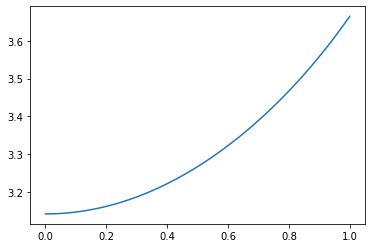

In [20]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

Для выражения многих переменных, мы также можем использовать функцию замены

In [21]:
F

x**2 + y*sin(z)

In [22]:
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

# Учет единиц измерения

Для учета единиц измерения в sympy предусмотрен модуль sympy.physics.units в котором сосредоточены встроенные единицы измерения, а также возможности по созданию частных единиц измерения

In [23]:
from sympy.physics.units import speed_of_light, meter, second

speed_of_light

speed_of_light

In [24]:
speed_of_light.convert_to(meter/second)

299792458*meter/second

Нам бы хотелось определить собственные единицы измерения

In [25]:
import sympy.physics.units as u
meter = u.quantities.Quantity("метр", abbrev="м")
meter.set_global_relative_scale_factor(1,u.meter)
second = u.quantities.Quantity("сек", abbrev="с")
second.set_global_relative_scale_factor(1,u.second)

u.speed_of_light.convert_to([meter,second])

299792458*метр/сек

# Примеры

Падающий объект встречается с платформой, ускоряющейся наверх:

1. Положение объекта $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Положение платформы $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Надо найти такую начальную скорость $v_0$ чтобы, когда платформа и объект сталкиваются, они двигаются с одной скоростью.**

Мы должны найти $v_0$ и $t$, чтобы они удовлетворяли следующим уравнениям:

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

В sympy, нам необходимо сделать систему уравнений $EQ_1=0$, $EQ_2=0$, ...   
поэтому исходные уравнения надо переписать так

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [ ]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Определяем выражения

In [ ]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

Определяем уравнения

In [ ]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Решаем уравнения

In [ ]:
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [ ]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [ ]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [ ]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**А какая скорость будет, когда они сталкиваются?**

In [ ]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [ ]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Матанализ 1-го курса ВУЗа

In [ ]:
x = smp.symbols('x')

## Пределы

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [36]:
lim_expr = smp.Limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)
lim_expr

Limit(sin(x/2 + sin(x)), x, pi)

In [37]:
lim_expr.doit()

1

In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

## Производные 

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [38]:
eq = smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x,evaluate = False)
eq

Derivative((sin(x) + 1)**2/(1 - cos(x))**2, x)

In [39]:
eq.doit()

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\frac{d}{dx} f(x+g(x)) $$

In [40]:
f, g = smp.symbols('f g', cls=smp.Function)

In [41]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [42]:
f

f(x + g(x))

In [ ]:
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [ ]:
dfdx.subs([(g, smp.sin(x))]).doit() # need to call doit

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Антипроизводные

sympy позволяет брать интегралы, однако при этом он не добавляет обозначение константы. Поэтому правильнее назвать результат взятия неопределенного интеграла антипроизводной

$$ \int \csc(x) \cot (x)  dx $$

In [ ]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Определенные интегралы 

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [ ]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx $$

In [ ]:
t= smp.symbols('t')

In [ ]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Примеры 

Волновая функция атома водорода:

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

Средний радиус электрона от ядра определяется выражением:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

Стандартное отклонение расстояния электрона определяется выражением:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [ ]:
from sympy import assoc_laguerre

Определяем переменные, не забываем про их аттрибуты

In [ ]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

Определяем $R_{nl}(r)$

In [ ]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

Мы можем проверить, действительно ли это выражение удовлетворяет радиальным волновым функциям. Найдем $R_{10}(r)$

In [ ]:
R_10 = R.subs([(n,4),(l,3)])
R_10

sqrt(35)*r**3*exp(-r/(4*a))/(26880*a**(9/2))

Создадим функцию для вычисления $\int_{0}^{\infty} R_{nl}^2 r^k dr$ для определенных значений $n$, $l$ и $k$

In [ ]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

Вычисляем значение среднего расстояния электрона в состоянии $\psi_{100}$

In [ ]:
compute_int(n_val=3,l_val=1,k=3)

25*a/2

Вычисляем среднее отклонение $\sigma$ для состояния $\psi_{100}$

In [ ]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

Значение среднего радиуса для состояния $\psi_{420}$

In [ ]:
compute_int(n_val=4,l_val=2,k=3)

21*a

In [ ]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [ ]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

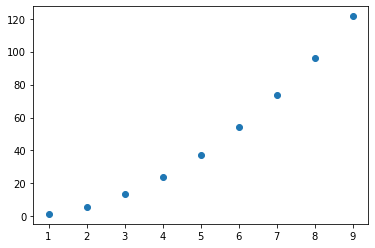

In [ ]:
plt.scatter(ns, ds)

# Многомерные вычисления

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Векторы и геометрия

In [ ]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Суммирование и умножение

In [ ]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Скалярное произведение

In [ ]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Векторное произведение

In [ ]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Модуль вектора

In [ ]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [ ]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Прямые: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [ ]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Плоскости: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [ ]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Векторные выражения

### Векторные производные 

In [ ]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [ ]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Пример:** Найти угол между скоростью и ускорением как функцию времени $\theta(t)$

In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

найти угол $\theta$ при $t=6$

In [ ]:
theta.subs(t,6).evalf()

0.251108015692338

### Векторные антипроизводные

In [ ]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [ ]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

В некоторых случаях интегралы не могут быть найдены аналитически, в таких случаях придется искать их численно

In [ ]:
from scipy.integrate import quad_vec

In [ ]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [ ]:
r_f = smp.lambdify([t], r)

In [ ]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

### Длина дуги 

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Редко когда можно получить аналитически. Надо найти длину дуги $\left< 0, t, t^2 \right>$ от $t=0$ до $t=1$

In [ ]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [ ]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

# Пример

Магнитное поле в точке $\vec{r}$ в текущей конфигурации:

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

где $\vec{r} = (x,y,z)$ и $\vec{l} = (f(t), g(t), h(t))$ это одномерная кривая в пространстве которая определяет положение токопроводящей проволоки.

**Часть 1: Определите подинтегральное выражение**

In [ ]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

Определите $\vec{r}$, $\vec{\ell}$ и $\vec{d\ell/dt}$

In [ ]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

Определите подинтегральное выражение

In [ ]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [ ]:
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

**Часть 2**: Найдите магнитное поле на расстояние $H$ выше кольца с радиусом $R$, в котором ток течет по часовой стрелке

In [ ]:
R, H = smp.symbols('R, H', real=True)

In [ ]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

Находим магнитное поле

In [ ]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

Для более сложных конфигурации проволоки, придется использовать численное интегрирование

## Частные производные 

In [ ]:
x, y, z = smp.symbols('x y z')

### Основы 

Частные производные $\partial f / \partial x$ и $\partial f / \partial y$ для $f(x,y)=y^2\sin(x+y)$

In [ ]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [ ]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Или более сложные вещи, как $\frac{\partial^3 f}{\partial xy^2}$

In [ ]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### Производная сложной функции 

In [ ]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Предположим $x$, $y$, и $z$ это функции от $t$ 
* $w$ это функция от $x$, $y$, и $z$. т.е  $w=w(x,y,z)$

Надо найти $dw/dt$

In [ ]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [ ]:
w

w(x(t), y(t), z(t))

Определяем в общей форме:

In [ ]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Или при использовании специальных функций:

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [ ]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Множественные интегралы

В редких случаях это возможно аналитически:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

## Лагранжева механика 

Упрощенная идея Лагранжевой механики состоит в том, что кинетическая энергия и потенциальная энергия системы, может быть выражена в терминах обобщенной координаты и скорости.

$$T = T(q,\dot{q}) \hspace{20mm} V=V(q,\dot{q})$$

где $q$ может быть координаты частицы или некоего угла $\theta$ (маятника), или др. Решая $L=T-V$, следующее уравнение дает нам уравнение движения $q(t)$

$$\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $$

для всех различных $q$ системы. Это дает уравнение второго порядкка для всех различных $q(t)$s.

**Пример**: Найдем уравнения движения в дифференциальной форме

<p align="center">
  <img src=".\symp_tut_p1.PNG" alt="drawing" width="300" align="center"/>
</p>

Пусть $(x,y)$ это положение конца маятника

In [ ]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

Определяем положение маятника

In [ ]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)

In [ ]:
y

-R*cos(\theta(t))

Кинетическая и потенциальная энергия

In [ ]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = m2*g*y
V = V1 + V2

Определяем лагранжиан

In [ ]:
L = T-V

In [ ]:
L

R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

In [ ]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)

In [ ]:
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

In [ ]:
LE2

-R*g*m_2*sin(\theta(t)) + m_2*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t))/2 - m_2*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(z(t), (t, 2)))*cos(\theta(t)))/2

Мы хотим решить систему двух уравнений второго порядка

In [ ]:
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])

In [ ]:
sols

{Derivative(z(t), (t, 2)): R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2),
 Derivative(\theta(t), (t, 2)): -R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)}

Находим $d^2 \theta / dt^2 = $

In [ ]:
sols[smp.diff(theta,t,t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

Находим $d^2 z / dt^2 = $

In [ ]:
sols[smp.diff(z,t,t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)

С этими двумя уравнениями система может быть численно решена

# Задания

## Задание №1
Создайте выражение 
$$f = x e^{-x} + x (1-x)$$
Затем вычислите при
$$x = 0, 0.1, 0.2, 0.4, 0.8$$
## Задание №2
Разложите уравнение на множители:
$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$
Затем выведите корни уравнения
## Задание №3
Проинтегрируйте функцию
$$
f = \sin(x) e^{-x}
$$
Затем попробуйте продифференцировать ее, чтобы увидеть, соответствует ли результат исходному уравнению
## Задание №4
Сделайте функцию, которая принимает выражение в виде строки (с произвольным количеством символов) и создает python функцию, которая на вход значения этих символов, а выводит результат вычисления.